# Estimation on simulated data using MSM

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import time
import matplotlib.pyplot as plt

# Singles

In [2]:
Single = RetirementClass(simN=int(1e5),simT=68-57+1)
Single.solve()
Single.simulate()

### Simulate data

In [3]:
shape = (11,8)

In [4]:
mom_data = SMD.MomFunSingle(Single)
mm = mom_data.reshape(shape)
mom_se = SMD.MomFunSingle(Single,calc='std')
weight = SMD.weight_matrix_single(mom_se,shape,factor=[1/10,1/10,1,1,1,1,1,1,1,1/2,1/3])
ww = np.diag(weight).reshape(shape)

Weight matrix

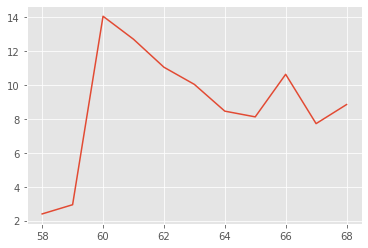

In [5]:
plt.plot(np.arange(58,69),np.mean(ww,axis=1))
plt.show()

Moments

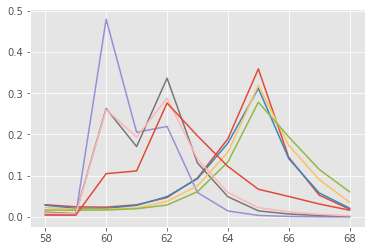

In [6]:
plt.plot(np.arange(58,69), mm)
plt.show()

### Set up model for estimation

In [7]:
Single.par.sim_seed = Single.par.sim_seed + 100 # set new seed for estimation
Single.recompute()

In [8]:
# function to generate moments
def mom_fun(Single):
    return SMD.MomFunSingle(Single)

In [9]:
par = Single.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta])
est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta"]

# Setup estimation
smd = SMD.SimulatedMinimumDistance(Single,mom_data,mom_fun)
smd.est_par = est_par

### Run estimation

In [10]:
true

array([0.4  , 0.4  , 0.053, 0.435])

In [11]:
theta0 = SMD.start(10,bounds=[(0.0,1.0), (0.0,1.0), (-1.0,1.0), (0.2,0.8)])
#theta0[0] = list(true)

In [12]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 45 | time: 0.6 min | obj: 0.006442150995008042
start par: [0.4, 0.4, 0.053, 0.435]
par:       [0.40119764 0.40420859 0.05312809 0.44075831]

2 estimation:
success: True | feval: 189 | time: 2.6 min | obj: 0.006246777496728611
start par: [0.649, 0.241, 0.388, 0.927]
par:       [0.40290408 0.40492348 0.05246627 0.44282838]

3 estimation:
success: True | feval: 158 | time: 2.2 min | obj: 0.006389641786319818
start par: [0.482, 0.535, -0.474, 0.972]
par:       [0.40166519 0.40437802 0.05334801 0.44176037]

4 estimation:
success: True | feval: 189 | time: 2.6 min | obj: 0.006221358086381173
start par: [0.459, 0.897, -0.788, 0.578]
par:       [0.40146412 0.40326824 0.05331418 0.44098201]

5 estimation:
success: True | feval: 204 | time: 2.9 min | obj: 0.006295397494806711
start par: [0.598, 0.788, 0.955, 0.709]
par:       [0.40144271 0.40335322 0.05353276 0.44036421]

6 estimation:
success: True | feval: 196 | time: 2.8 min | obj: 0.006342915259697083
sta

In [13]:
print('par :', est_par)
print('bias:', theta-true)

par : ['alpha_0_male', 'alpha_0_female', 'alpha_1', 'sigma_eta']
bias: [-0.00121607  0.00053276  0.00093263  0.00175803]


### clean up (to save memory)

In [14]:
del Single

# Couples

In [17]:
Couple = RetirementClass(couple=True, simT=68-53+1)
Couple.solve()
Couple.simulate()

### Simulate data

In [18]:
shape = (2,11,25)

In [19]:
mom_data = SMD.MomFunCouple(Couple)
mm = mom_data.reshape(shape)
mom_se = SMD.MomFunCouple(Couple,calc='std')
weight = SMD.weight_matrix_couple(mom_se,shape,factor=[1/1e7,1/1e5,1/1e5,1/1e5,1,1,1,1,1/5,1/5,1/5])
ww = np.diag(weight).reshape(shape)

In [20]:
weight = np.eye(mom_data.size)*10
ww = np.diag(weight).reshape(shape)

Weight matrix

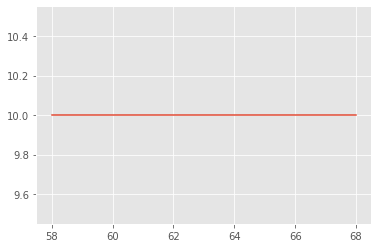

In [21]:
plt.plot(np.arange(58,69),np.mean(ww,axis=(0,2)))
plt.show()

Moments - Women

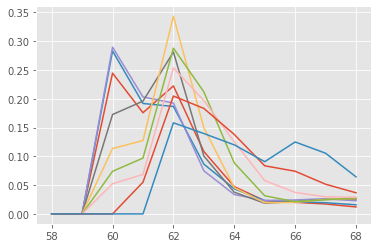

In [22]:
plt.plot(np.arange(58,69),mm[1,:,:9])
plt.show()

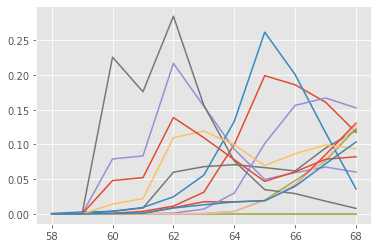

In [23]:
plt.plot(np.arange(58,69),mm[1,:,9:])
plt.show()

Moments - Men

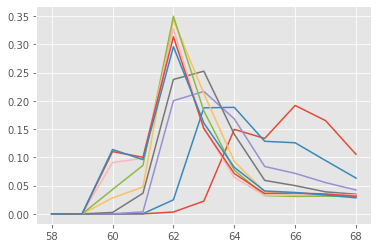

In [24]:
plt.plot(np.arange(58,69),mm[0,:,:9])
plt.show()

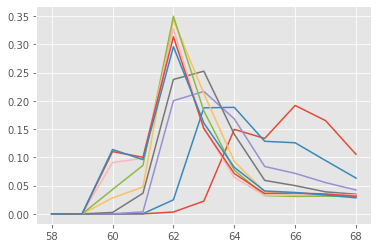

In [25]:
plt.plot(np.arange(58,69),mm[0,:,:9])
plt.show()

### Identification of phi across gender?

In [27]:
est_par = ["alpha_0_male", "alpha_0_female", "phi_0_male", "phi_0_female"]
par_save = est_par[2:]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

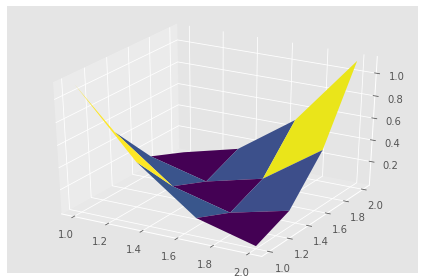

In [39]:
true_par = [0.5, 0.5, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=10)

In [ ]:
true_par = [0.6, 0.2, 1.1, 1.6]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=10)

### Set up model for estimation

In [11]:
Couple.par.sim_seed = Couple.par.sim_seed + 100 # set new seed
Couple.recompute()
Couple.Single.recompute()

In [12]:
# function to generate moments
def mom_fun(Couple):
    return SMD.MomFunCouple(Couple)

In [13]:
par = Couple.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta, 
                 par.phi_0_male, par.phi_0_female, par.phi_1])

est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta", "phi_0", "phi_1"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun)
smd.est_par = est_par

### Run estimation

In [ ]:
theta0 = SMD.start(10,bounds=[(0.0,1.0), (0.0,1.0), (-1.0,1.0), (0.2,0.8), (0.5,2.0), (-1.0,1.0)])
#theta0[0] = list(true)

In [ ]:
#smd.print_iter = [True,100] # print every 100 func eval
smd.MultiStart(theta0,weight)
theta = smd.est

In [ ]:
print('par :', est_par)
print('bias:', theta-true)